============== 1/16 ==============
epoch:0 | 0.116 - 0.138


../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.125
epoch:2 | 0.097 - 0.116
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.152
epoch:5 | 0.097 - 0.163
epoch:6 | 0.097 - 0.182
epoch:7 | 0.097 - 0.201
epoch:8 | 0.097 - 0.221
epoch:9 | 0.097 - 0.239
epoch:10 | 0.097 - 0.257
epoch:11 | 0.097 - 0.276
epoch:12 | 0.097 - 0.286
epoch:13 | 0.097 - 0.306
epoch:14 | 0.097 - 0.319
epoch:15 | 0.097 - 0.336
epoch:16 | 0.097 - 0.339
epoch:17 | 0.097 - 0.359
epoch:18 | 0.097 - 0.369
epoch:19 | 0.097 - 0.384
============== 2/16 ==============


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:0 | 0.1 - 0.1
epoch:1 | 0.097 - 0.13
epoch:2 | 0.097 - 0.175
epoch:3 | 0.097 - 0.199
epoch:4 | 0.097 - 0.216
epoch:5 | 0.097 - 0.238
epoch:6 | 0.097 - 0.255
epoch:7 | 0.097 - 0.275
epoch:8 | 0.097 - 0.296
epoch:9 | 0.097 - 0.319
epoch:10 | 0.097 - 0.346
epoch:11 | 0.097 - 0.368
epoch:12 | 0.097 - 0.386
epoch:13 | 0.097 - 0.409
epoch:14 | 0.097 - 0.421
epoch:15 | 0.097 - 0.428
epoch:16 | 0.097 - 0.452
epoch:17 | 0.097 - 0.459
epoch:18 | 0.097 - 0.484
epoch:19 | 0.097 - 0.493
============== 3/16 ==============
epoch:0 | 0.141 - 0.124
epoch:1 | 0.322 - 0.138
epoch:2 | 0.453 - 0.156
epoch:3 | 0.486 - 0.186
epoch:4 | 0.584 - 0.211
epoch:5 | 0.631 - 0.26
epoch:6 | 0.684 - 0.297
epoch:7 | 0.717 - 0.331
epoch:8 | 0.743 - 0.378
epoch:9 | 0.775 - 0.41
epoch:10 | 0.78 - 0.426
epoch:11 | 0.821 - 0.453
epoch:12 | 0.831 - 0.483
epoch:13 | 0.859 - 0.509
epoch:14 | 0.856 - 0.533
epoch:15 | 0.878 - 0.556
epoch:16 | 0.888 - 0.566
epoch:17 | 0.903 - 0.58
epoch:18 | 0.907 - 0.604
epoch:19 | 0.91 - 0

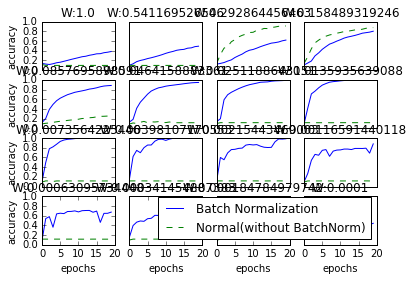

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.116666666667, test acc:0.0915
epoch:1, train acc:0.143333333333, test acc:0.1069
epoch:2, train acc:0.166666666667, test acc:0.1278
epoch:3, train acc:0.22, test acc:0.1512
epoch:4, train acc:0.24, test acc:0.1752
epoch:5, train acc:0.256666666667, test acc:0.1907
epoch:6, train acc:0.266666666667, test acc:0.2036
epoch:7, train acc:0.28, test acc:0.2155
epoch:8, train acc:0.3, test acc:0.2244
epoch:9, train acc:0.31, test acc:0.2334
epoch:10, train acc:0.316666666667, test acc:0.2395
epoch:11, train acc:0.316666666667, test acc:0.2426
epoch:12, train acc:0.313333333333, test acc:0.2505
epoch:13, train acc:0.32, test acc:0.2568
epoch:14, train acc:0.333333333333, test acc:0.27
epoch:15, train acc:0.336666666667, test acc:0.279
epoch:16, train acc:0.336666666667, test acc:0.2868
epoch:17, train acc:0.356666666667, test acc:0.2932
epoch:18, train acc:0.386666666667, test acc:0.2991
epoch:19, train acc:0.403333333333, test acc:0.3119
epoch:20, train acc:0.393333333333

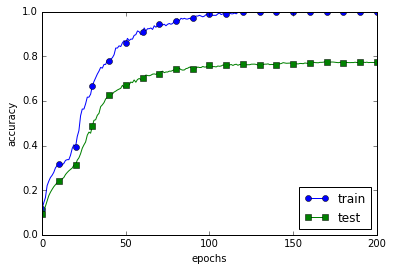

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.0478119482847
W3:0.0
b3:1.20126128489e-10


epoch:0, train acc:0.07, test acc:0.0959
epoch:1, train acc:0.0866666666667, test acc:0.1149
epoch:2, train acc:0.116666666667, test acc:0.1282
epoch:3, train acc:0.133333333333, test acc:0.1345
epoch:4, train acc:0.17, test acc:0.1457
epoch:5, train acc:0.183333333333, test acc:0.1595
epoch:6, train acc:0.19, test acc:0.1702
epoch:7, train acc:0.216666666667, test acc:0.1817
epoch:8, train acc:0.243333333333, test acc:0.1999
epoch:9, train acc:0.26, test acc:0.212
epoch:10, train acc:0.3, test acc:0.2315
epoch:11, train acc:0.316666666667, test acc:0.2456
epoch:12, train acc:0.35, test acc:0.2635
epoch:13, train acc:0.37, test acc:0.2738
epoch:14, train acc:0.363333333333, test acc:0.2848
epoch:15, train acc:0.386666666667, test acc:0.303
epoch:16, train acc:0.416666666667, test acc:0.3152
epoch:17, train acc:0.453333333333, test acc:0.3295
epoch:18, train acc:0.463333333333, test acc:0.3424
epoch:19, train acc:0.483333333333, test acc:0.3545
epoch:20, train acc:0.5, test acc:0.3645
e

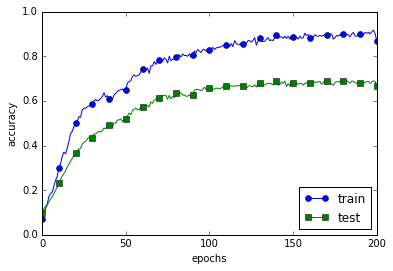

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.28812761815
=== epoch:1, train acc:0.11, test acc:0.092 ===
train loss:2.27576722327
train loss:2.27949162669
train loss:2.28878164368
=== epoch:2, train acc:0.11, test acc:0.0929 ===
train loss:2.29197868433
train loss:2.27081157157
train loss:2.27256895785
=== epoch:3, train acc:0.11, test acc:0.0933 ===
train loss:2.28148696839
train loss:2.26911466708
train loss:2.28350019926
=== epoch:4, train acc:0.11, test acc:0.0936 ===
train loss:2.27413536853
train loss:2.30646524181
train loss:2.28561739287
=== epoch:5, train acc:0.11, test acc:0.0938 ===
train loss:2.27129170063
train loss:2.29195809666
train loss:2.2826014903
=== epoch:6, train acc:0.103333333333, test acc:0.0924 ===
train loss:2.29943158767
train loss:2.27421469382
train loss:2.27386981582
=== epoch:7, train acc:0.1, test acc:0.0917 ===
train loss:2.27088893152
train loss:2.27427436535
train loss:2.2671663988
=== epoch:8, train acc:0.0966666666667, test acc:0.0916 ===
train loss:2.27022403327
train loss:2.264

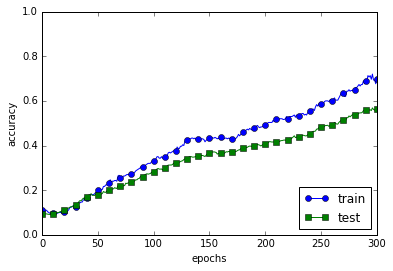

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


val acc:0.14 | lr:0.0006123458285824671, weight decay:5.496876757942266e-07
val acc:0.09 | lr:1.706091924023771e-06, weight decay:1.4443558966666647e-06
val acc:0.12 | lr:0.00030445967178904007, weight decay:1.6602639249298546e-06
val acc:0.35 | lr:0.0021229912077545504, weight decay:3.3478606859395893e-06
val acc:0.24 | lr:0.0007269545341994864, weight decay:1.0449969249983977e-05
val acc:0.12 | lr:1.7680166789635207e-05, weight decay:2.9528016787622463e-05
val acc:0.06 | lr:0.0002360825286023106, weight decay:9.97089866170021e-07
val acc:0.14 | lr:2.590239511582132e-05, weight decay:1.9484674488055505e-08
val acc:0.09 | lr:1.0695310153189935e-06, weight decay:5.364125432424821e-08
val acc:0.1 | lr:2.437986606248641e-06, weight decay:2.9715768395219847e-08
val acc:0.68 | lr:0.004980754621530307, weight decay:1.2303345774657596e-07
val acc:0.11 | lr:5.099292915602427e-06, weight decay:1.4922079253053481e-06
val acc:0.2 | lr:0.00013482840715092073, weight decay:1.6979158731505696e-06
va

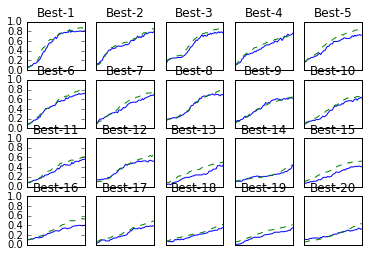

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()